In [3]:
import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [4]:
train_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2

In [6]:
size = 224

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train_data,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [7]:
train_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

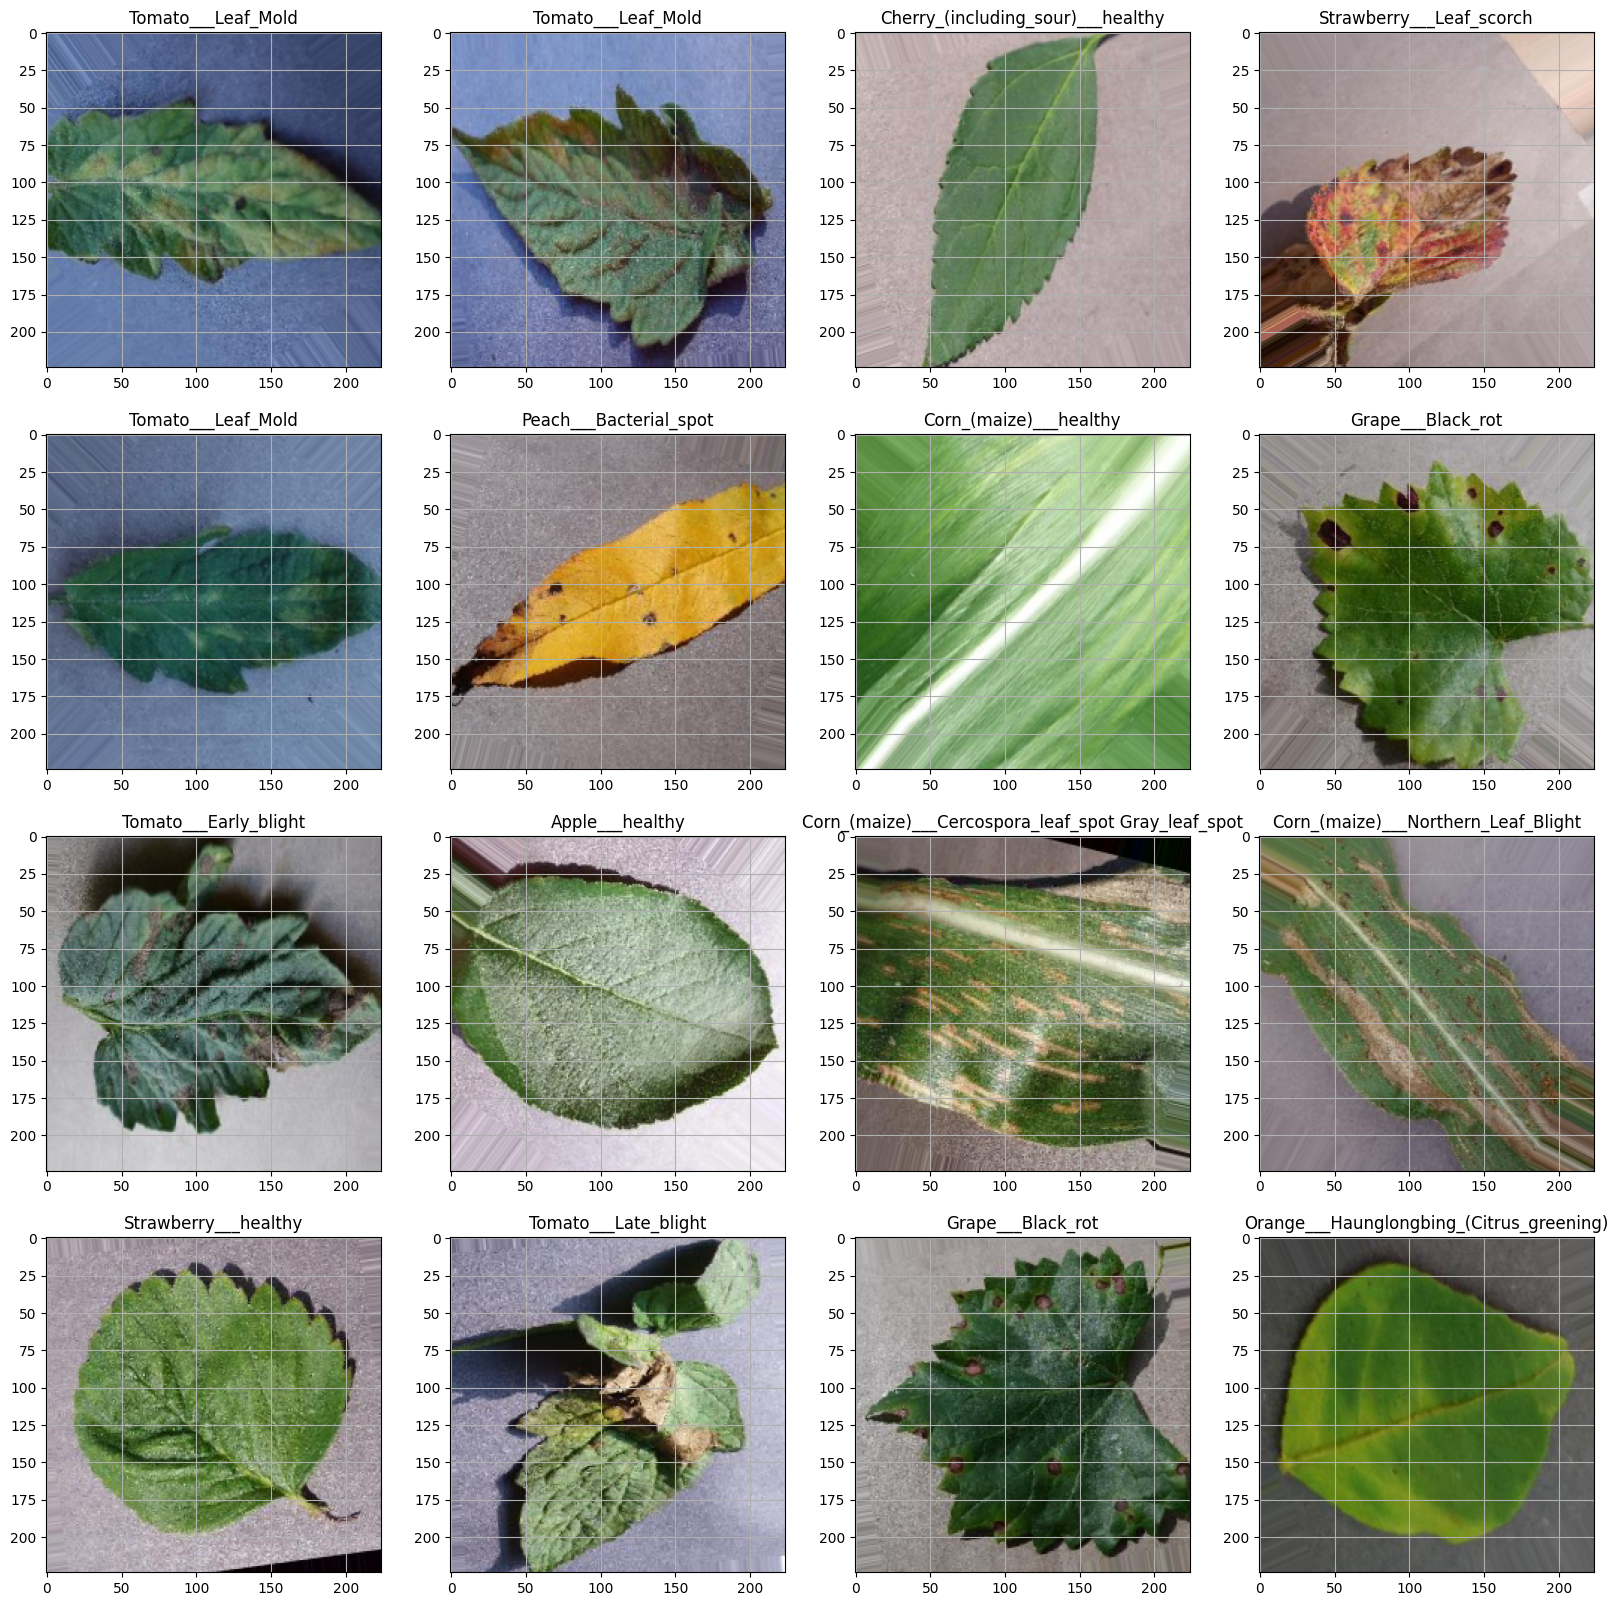

In [8]:
images = list(train_gen.class_indices.keys())
plt.figure(figsize=(20,20))

for X_batch, y_batch in train_gen:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(images[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [9]:
valid_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid_data,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [10]:
valid_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [11]:
test_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test_data,
                      batch_size=64,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)

Found 17572 images belonging to 38 classes.


In [12]:
test_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [13]:
import pandas as pd

train_files = train_gen.filenames
train_labels = train_gen.classes

valid_files = valid_gen.filenames
valid_labels = valid_gen.classes

train_df = pd.DataFrame({'filepath': train_files, 'label': train_labels})
valid_df = pd.DataFrame({'filepath': valid_files, 'label': valid_labels})

In [14]:
print("Training Data:")
train_df.head()

Training Data:


,filepath,label
0,Apple___Apple_scab/1b1004c8-99e9-4c85-8fe5-b1c...,0
1,Apple___Apple_scab/1b1004c8-99e9-4c85-8fe5-b1c...,0
2,Apple___Apple_scab/1bc60205-27cc-4d10-bc87-7e9...,0
3,Apple___Apple_scab/1bc60205-27cc-4d10-bc87-7e9...,0
4,Apple___Apple_scab/1bc60205-27cc-4d10-bc87-7e9...,0


In [15]:
print("Validation Data:")
valid_df.head()

Validation Data:


,filepath,label
0,Apple___Apple_scab/00075aa8-d81a-4184-8541-b69...,0
1,Apple___Apple_scab/00075aa8-d81a-4184-8541-b69...,0
2,Apple___Apple_scab/00075aa8-d81a-4184-8541-b69...,0
3,Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620...,0
4,Apple___Apple_scab/0208f4eb-45a4-4399-904e-989...,0


In [16]:
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding='same',
                              activation='relu', name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                              activation='relu', name='Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(128, activation='relu', name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation='softmax', name='Output'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  monitor='val_loss', save_best_only=True)
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [20]:
history = model.fit(train_gen, epochs=5, validation_data=valid_gen, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.2293 - loss: 2.8465 - precision: 0.6057 - recall: 0.0945 - val_accuracy: 0.5075 - val_loss: 1.7385 - val_precision: 0.6746 - val_recall: 0.3594 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 766s 2s/step - accuracy: 0.6547 - loss: 1.1172 - precision: 0.8031 - recall: 0.5271 - val_accuracy: 0.6711 - val_loss: 1.0663 - val_precision: 0.7608 - val_recall: 0.5970 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 766s 2s/step - accuracy: 0.7671 - loss: 0.7401 - precision: 0.8463 - recall: 0.6970 - val_accuracy: 0.8037 - val_loss: 0.5905 - val_precision: 0.8610 - val_recall: 0.7646 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 803s 2s/step - accuracy: 0.8398 - loss: 0.4965 - precision: 0.8836 - recall: 0.8019 - val_accuracy: 0.8255 - val_loss: 0.5306 - val_precision: 0.8627 - val_recall: 0.7933 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - accuracy: 

In [21]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

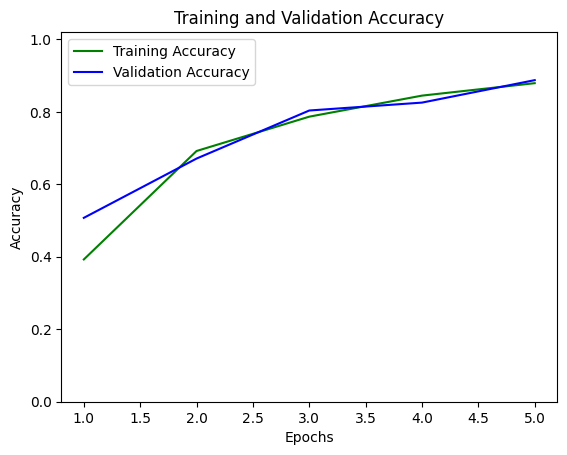

In [22]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [23]:
model_evaluate = model.evaluate(test_gen)
print("loss:", model_evaluate[0])
print("accuracy:", model_evaluate[1])
print("precision:", model_evaluate[2])
print("recall:", model_evaluate[3])

275/275 ━━━━━━━━━━━━━━━━━━━━ 45s 148ms/step - accuracy: 0.8765 - loss: 0.3917 - precision: 0.9019 - recall: 0.8569
loss: 0.3444311022758484
accuracy: 0.8899385333061218
precision: 0.9118102788925171
recall: 0.8708171844482422


In [ ]:
model.save('cnn_model.keras')